## Tips for working CSV files and Pandas DataFrame objects and methods

### Problem: I have multiple data files (month by month) from NYS Mesonet and I want to get a full
### year of data into a numpy array for one station

#### I'll use a loop to read the 12 CSV files and merge the data frames into one big data frame
#### Then group  by station ID
#### Then I apply the previously introduced column selection method 
#### And plot the time series



In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [11]:
dpath="/home11/staff/timm/Public/Data/MESONET/"    


# load the first one
filelist=["202001.csv","202002.csv","202003.csv","202004.csv","202005.csv","202006.csv",
          "202007.csv","202008.csv","202009.csv","202010.csv","202011.csv","202012.csv"]
df_list=[] # collect all individual data frames in a list
for filename in filelist:
    print( dpath+filename)
    df_list.append(pd.read_csv(dpath+filename))


/home11/staff/timm/Public/Data/MESONET/202001.csv
/home11/staff/timm/Public/Data/MESONET/202002.csv
/home11/staff/timm/Public/Data/MESONET/202003.csv
/home11/staff/timm/Public/Data/MESONET/202004.csv
/home11/staff/timm/Public/Data/MESONET/202005.csv
/home11/staff/timm/Public/Data/MESONET/202006.csv
/home11/staff/timm/Public/Data/MESONET/202007.csv
/home11/staff/timm/Public/Data/MESONET/202008.csv
/home11/staff/timm/Public/Data/MESONET/202009.csv
/home11/staff/timm/Public/Data/MESONET/202010.csv
/home11/staff/timm/Public/Data/MESONET/202011.csv
/home11/staff/timm/Public/Data/MESONET/202012.csv


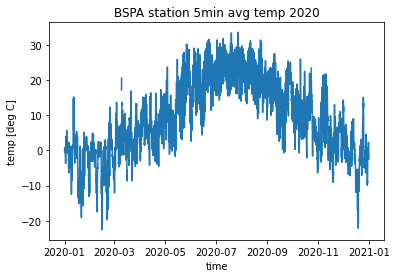

In [12]:
bspa=dfg.get_group("BSPA")
temp=bspa['tavg'].values
plt.xlabel("time")
plt.ylabel("temp [deg C]")
plt.title("BSPA station 5min avg temp 2020")
plt.plot(timehelp,temp)
plt.show()

In [14]:
# this concatenates the data frames
df2020=pd.concat(df_list)
df2020=df2020.rename(columns={"time_end":"time","temp_2m_avg [degC]":"tavg"})
df2020=df2020[['station','time','tavg']] # just the thre columns
dfg=df2020.groupby('station')

# TODO: Better conversion of time to datetime needed later
timehelp=pd.to_datetime(bspa['time'])

### Here is a code example how to group by the station ids and repeat for each station a statistical average calculation

The calculation of the time averaged temperature is done with data from the full year.

We collect all mean values in a list and convert the list into an array tmean.

In [15]:
# print the group names (keys)
tmean =[]

stations=dfg.groups.keys()
for i,s in enumerate(stations):
    dfhelp=dfg.get_group(s)
    thelp=dfhelp['tavg'].values
    tmean.append(np.nanmean(thelp))
    print(f"{i :3d} {s} mean={np.nanmean(thelp) : 6.2f} deg C")
    

  0 ADDI mean=  8.71 deg C
  1 ANDE mean=  8.09 deg C
  2 BATA mean=  9.78 deg C
  3 BEAC mean= 11.82 deg C
  4 BELD mean=  8.75 deg C
  5 BELL mean=  9.47 deg C
  6 BELM mean=  8.93 deg C
  7 BERK mean=  8.31 deg C
  8 BING mean=  8.97 deg C
  9 BKLN mean= 13.75 deg C
 10 BRAN mean= 10.28 deg C
 11 BREW mean= 10.44 deg C
 12 BROC mean= 10.07 deg C
 13 BRON mean= 13.65 deg C
 14 BROO mean=  7.96 deg C
 15 BSPA mean=  9.16 deg C
 16 BUFF mean=  9.80 deg C
 17 BURD mean=  8.63 deg C
 18 BURT mean= 10.20 deg C
 19 CAMD mean=  8.67 deg C
 20 CAPE mean=  8.88 deg C
 21 CHAZ mean=  7.81 deg C
 22 CHES mean=  7.78 deg C
 23 CINC mean=  8.03 deg C
 24 CLAR mean=  7.57 deg C
 25 CLIF mean= 10.01 deg C
 26 CLYM mean=  8.56 deg C
 27 COBL mean=  9.18 deg C
 28 COHO mean=  8.06 deg C
 29 COLD mean=  7.47 deg C
 30 COPA mean= 10.04 deg C
 31 COPE mean=  7.89 deg C
 32 CROG mean=  7.67 deg C
 33 CSQR mean=  9.21 deg C
 34 DELE mean=  7.86 deg C
 35 DEPO mean=  8.77 deg C
 36 DOVE mean= 10.08 deg C
 

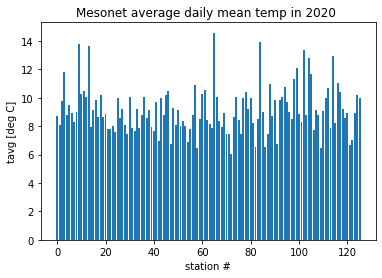

In [16]:
plt.bar(np.arange(0,len(stations),1),tmean)
plt.xlabel("station #")
plt.ylabel("tavg [deg C]")
plt.title("Mesonet average daily mean temp in 2020 ")
plt.show()